# TUBERCULOSIS TREATMENT EFFECT USING MACHINE LEARNING 

![tuberculosis](tuberculosis.jpg)

## BUILDING A MODEL TO TEST THE EFFECTIVENESS OF TREATMENT ON TUBERCULOSIS

### THE MODEL WILL BE BUILT USING 4 DIFFERENT ALGORITHMS:
### - LOGISTIC REGRESSION
### - K NEAREST NEIGHBOUR
### - SUPPORT VECTOR MACHINE (SVM)
### - RANDOM FOREST 

## Importing necessary libraries 

In [3]:
from math import floor
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_fscore_support, recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

### READING IN THE DATASETS 

In [4]:
specimen_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2022.csv')
specimen_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Specimen_January_2023.csv')
regimens_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2022.csv')
regimens_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Regimens_January_2023.csv')
patients_2022 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2022.csv')
patients_2023 = pd.read_csv('Tuberculosis files/TB_Portals_Patient_Cases_January_2023.csv')
patients_nig = pd.read_csv('Tuberculosis files/TB_Data_Nigeria.csv')

#### Making copies of the datasets

In [5]:
patients_2022_copy = patients_2022.copy()
patients_2023_copy = patients_2023.copy()

specimens_2022_copy = specimen_2022.copy()
specimens_2023_copy = specimen_2022.copy()

regimens_2022_copy = regimens_2022.copy()
regimens_2023_copy = regimens_2023.copy()

patients_nig_copy = patients_nig.copy()

In [6]:
# Checking the info about the 2022 patients data
patients_2022_copy.info()
patients_column_list_2022 = patients_2022.columns.to_list()

# Checking the info about the 2023 patients data
patients_2023_copy.info()
patients_column_list_2023 = patients_2023.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Columns: 204 entries, condition_id to qure_atelectasis
dtypes: float64(6), int64(5), object(193)
memory usage: 10.3+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Columns: 206 entries, condition_id to qure_atelectasis
dtypes: float64(5), int64(6), object(195)
memory usage: 13.9+ MB


#### Selecting useful columns from the patients datasets

In [7]:
patients_column_list_2023

['condition_id',
 'patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'status',
 'organization',
 'image_body_site',
 'dissemination',
 'lungcavity_size',
 'anomaly_of_mediastinum_vessels_develop',
 'affect_pleura',
 'shadow_pattern',
 'affect_level',
 'pneumothorax',
 'plevritis',
 'affected_segments',
 'nodicalcinatum',
 'process_prevalence',
 'thromboembolism_of_the_pulmonaryartery',
 'posttbresiduals',
 'lung_capacity_decrease',
 'bronchial_obstruction',
 'anomaly_of_lungdevelop',
 'accumulation_of_contrast',
 'limfoadenopatia',
 'totalcavernum',
 'overall_percent_of_abnormal_volume',
 'pleural_effusion_percent_of_hemithorax_involved',
 'ispleuraleffusionbilateral',
 'other_non_tb_abnormalities',
 'are_mediastinal_lymphnodes_present',
 'rater',
 'collapse',

In [8]:
patients_column_list_2022
patients_column_list_needed = ['patient_id',
 'identifier',
 'registration_date',
 'age_of_onset',
 'gender',
 'country',
 'education',
 'employment',
 'number_of_children',
 'number_of_daily_contacts',
 'case_definition',
 'diagnosis_code',
 'type_of_resistance',
 'bmi',
 'lung_localization',
 'x_ray_count',
 'comorbidity',
 'regimen_count',
 'regimen_drug',
 'status']

patients_2022_new = patients_2022_copy[patients_column_list_needed]

patients_2022_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,comorbidity,regimen_count,regimen_drug,status
0,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
1,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
2,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,None,1,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",final
3,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,"Diabetes, Hepatitis C, HIV",1,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...",final
4,79bf51ab-76ea-4bab-a3ab-bef40f1b618e,4195,2019,58,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6591,00ac6a80-f27f-41c2-8c03-7d86d53d50db,8872,2019,33,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,New,A15.1,Poly DR,16.2,Pulmonary,1,None,1,"Capreomycin, Ethambutol, Isoniazid, Levofloxac...",final
6592,a32e3d5d-4e08-4461-8082-e850b1f7bdfe,9902,2021,17,Male,Ukraine,Basic school (incl. primary),Unemployed,NaN,NaN,New,A19.8,Sensitive,14.3,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
6593,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,"Not specified, Systemically administered gluco...",2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
6594,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final


#### Doing some necessary mathematics on the columns to cater for the missing values in some rows using the pandas fillna function 

In [9]:
patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_of_daily_contacts'].sum()/len(patients_2022_new))
patients_2022_new['bmi'] = patients_2022_new['bmi'].fillna(patients_2022_new['bmi'].sum()/len(patients_2022_new))

patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].astype('int')
patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].astype('int')
patients_2022_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6596 entries, 0 to 6595
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                6596 non-null   object 
 1   identifier                6596 non-null   int64  
 2   registration_date         6596 non-null   int64  
 3   age_of_onset              6596 non-null   int64  
 4   gender                    6596 non-null   object 
 5   country                   6596 non-null   object 
 6   education                 6596 non-null   object 
 7   employment                6596 non-null   object 
 8   number_of_children        6596 non-null   int32  
 9   number_of_daily_contacts  6596 non-null   int32  
 10  case_definition           6596 non-null   object 
 11  diagnosis_code            6596 non-null   object 
 12  type_of_resistance        6596 non-null   object 
 13  bmi                       6596 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\3638707757.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_children'] = patients_2022_new['number_of_children'].fillna(patients_2022_new['number_of_children'].sum()/len(patients_2022_new))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\3638707757.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2022_new['number_of_daily_contacts'] = patients_2022_new['number_of_daily_contacts'].fillna(patients_2022_new['number_

#### Performing the same processes on the 2023 patients dataset

In [10]:
patients_2023_new = patients_2023_copy[patients_column_list_needed]

patients_2023_new

,patient_id,identifier,registration_date,age_of_onset,gender,country,education,employment,number_of_children,number_of_daily_contacts,case_definition,diagnosis_code,type_of_resistance,bmi,lung_localization,x_ray_count,comorbidity,regimen_count,regimen_drug,status
0,3676197e-6bd7-4c41-8bb0-de5889997b32,8277,2019,40,Male,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
1,96f7d990-d005-4ecd-a22d-6d227d86a87d,6207,2020,23,Female,Georgia,Not Reported,Unemployed,NaN,NaN,New,A15.0,Sensitive,NaN,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
2,6affc79d-54c6-463f-b5af-f1f0e66776c6,9152,2019,48,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,New,A15.1,Sensitive,18.6,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
3,74aae92e-6a8e-437a-affc-a049f5322676,8020,2019,24,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0.0,1.0,Failure,A15.0,MDR non XDR,24.5,Pulmonary,1,None,1,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",final
4,6f8bb80f-1bc8-4e2e-bf6e-b4e3bebc662d,7020,2019,37,Male,Ukraine,College (bachelor),Unemployed,NaN,1.0,Failure,A19.8,XDR,22.3,Pulmonary,1,"Diabetes, Hepatitis C, HIV",1,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...",final
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8812,8fc2ff48-8480-4630-8552-cd34f5b55770,4433,2019,31,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2.0,3.0,New,A16.0,Mono DR,21.1,Pulmonary,1,"Not specified, Systemically administered gluco...",2,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
8813,5d381970-8df7-4fe9-b527-ce4a9d8c5c44,8908,2020,40,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0.0,1.0,Other,A15.0,Sensitive,19.8,Pulmonary,1,None,1,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",final
8814,b03880ea-a373-4530-9959-657dff0be22d,9446,2021,37,Male,Ukraine,Not Reported,Unemployed,NaN,NaN,New,A15.0,MDR non XDR,23.8,Pulmonary,1,None,1,"Bedaquiline, Clofazimine, Cycloserine, Levoflo...",final
8815,3efbbff9-f475-4d40-9dce-c92aac275f44,8904,2021,44,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2.0,3.0,Chronic TB,A15.0,MDR non XDR,16.7,Pulmonary,1,None,1,"Bedaquiline, Clofazimine, Delamanid, Levofloxa...",final


In [11]:
patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_new['number_of_daily_contacts'].sum()/len(patients_2023_new)))
patients_2023_new['bmi'] = patients_2023_new['bmi'].fillna(patients_2023_new['bmi'].sum()/len(patients_2023_new))


patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].astype('int')
patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].astype('int')
patients_2023_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8817 entries, 0 to 8816
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                8817 non-null   object 
 1   identifier                8817 non-null   int64  
 2   registration_date         8817 non-null   int64  
 3   age_of_onset              8817 non-null   int64  
 4   gender                    8817 non-null   object 
 5   country                   8817 non-null   object 
 6   education                 8817 non-null   object 
 7   employment                8817 non-null   object 
 8   number_of_children        8817 non-null   int32  
 9   number_of_daily_contacts  8817 non-null   int32  
 10  case_definition           8817 non-null   object 
 11  diagnosis_code            8817 non-null   object 
 12  type_of_resistance        8817 non-null   object 
 13  bmi                       8817 non-null   float64
 14  lung_loc

C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\137417697.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_children'] = patients_2023_new['number_of_children'].fillna(floor(patients_2023_new['number_of_children'].sum()/len(patients_2023_new)))
C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\137417697.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patients_2023_new['number_of_daily_contacts'] = patients_2023_new['number_of_daily_contacts'].fillna(floor(patients_2023_n

In [12]:
# converting the columns to list format
regimens_2022_copy.info()
regimens_column_list_2022 = regimens_2022.columns.to_list()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9644 entries, 0 to 9643
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   patient_id                  9644 non-null   object 
 1   condition_id                9644 non-null   object 
 2   period_start                9644 non-null   float64
 3   period_end                  8677 non-null   float64
 4   period_span                 8677 non-null   float64
 5   outcome_cd                  9643 non-null   object 
 6   activities_period_start     9644 non-null   float64
 7   activities_period_end       8896 non-null   float64
 8   activities_statusreason_cd  7382 non-null   object 
 9   regimen_drug                9644 non-null   object 
 10  dose                        30 non-null     float64
 11  collected                   30 non-null     float64
 12  reinfusioned                30 non-null     float64
dtypes: float64(8), object(5)
memory u

#### Selecting the necessary columns from the regimens dataset

In [13]:
regimens_column_list_2022
regimens_column_list_needed = ['patient_id',
 'condition_id',
 'period_span',
 'regimen_drug',
 'outcome_cd']

regimens_2022_new = regimens_2022_copy[regimens_column_list_needed]

regimens_2022_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
4,0046f70e-395f-40bb-b3a7-57b3fe3e97d1,ff562387-8969-4e27-bdd1-3146f45ea588,588.0,"{Cfz,Cs,Lzd,Mfx,Pto,Z}",completed
...,...,...,...,...,...
9639,ffcdbf6f-53a3-453a-9582-8725ed4234f3,239bdca1-a72e-4ecb-a9d9-97900dfd1759,609.0,"{Cs,Lfx,Pas,Pto}",completed
9640,ffd914a0-89dd-4a7e-a959-0342b3c43e20,38d66fbf-f2cf-49a8-9091-c76600af364b,188.0,"{Bdq,Cfz,Cs,Dld,Lzd}",failure
9641,ffdf3b67-bba2-4d0b-937d-fae6b75d4f63,a1aa80b9-bb80-40ef-9136-4fcc0580795f,278.0,"{E,H,Lfx,R,Z}",completed
9642,fff9f70e-2738-43c9-b42d-0c2139da52b9,728694fa-f21a-4055-b1f1-1580b1a9cf8a,38.0,"{Cm,E,H}",died


In [14]:
regimens_2022_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\3917202655.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2022_new.fillna(0,inplace=True)


In [15]:
regimens_2023_new = regimens_2023_copy[regimens_column_list_needed]

regimens_2023_new

,patient_id,condition_id,period_span,regimen_drug,outcome_cd
0,00069df2-2406-43b6-8c58-5f5e164c7e35,5016ee38-e166-4460-bbbb-3b8773824a5f,764.0,"{Amx/Clv,Cm,Cs,Mfx,Pas,Pto}",failure
1,000bb53b-8f25-4d5c-9146-fbe84c5316ab,a112409a-cc77-4923-b6e2-dfef53449bde,NaN,"{Bdq,Cfz,Lzd,Mfx}",stillOnTreatment
2,0027b572-338f-443e-b281-a0a0a2bbcda1,fc4a8d34-fa79-45af-93fa-7e2b9c290181,183.0,"{E,H,R,Z}",completed
3,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{E,H,R,S}",cured
4,0036983b-7577-487f-83d1-00522ed03ed5,b0f555d7-8ae2-49ec-aa59-37875ee26a2e,183.0,"{H,R}",cured
...,...,...,...,...,...
12780,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Cfz,Cm,E,H,Mfx,Pto,Z}",cured
12781,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Amx/Clv,Bdq,Cfz,Ipm/Cln,Lzd,Trd}",cured
12782,fffe1c1a-2b9d-4fcd-83bf-9eb4a7ee81aa,3ff582c1-3548-466f-8a2d-cb6df7fe31ad,583.0,"{Bdq,Cfz,Lzd}",cured
12783,ffff7e78-14af-415a-8f2e-82ae35e9f499,d593d898-ba1e-4b8d-8f3c-95129253b01b,272.0,"{Bdq,Cfz,Cs,Lfx,Lzd}",cured


In [16]:
regimens_2023_new.fillna(0,inplace=True)

C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\3115858346.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  regimens_2023_new.fillna(0,inplace=True)


#### Merging the patients 2022 and regimens 2022 datasets together.

In [17]:
patients_total_2022 = pd.merge(patients_2022_new, regimens_2022_new, on='patient_id')

#### Adding a new column to the combined data based on existing columns

In [18]:
patients_total_2022['outcome_cd_state'] = patients_total_2022['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed' else 'loss to follow up'))))

#### Doing the same process above to the patients 2023 and regimens 2023
- Merging DataFrames
- Renaming columns
- Adding new columns

In [19]:
patients_total_2023 = pd.merge(patients_2023_new, regimens_2023_new, on='patient_id')

In [20]:
patients_total_2023['outcome_cd_state'] = patients_total_2023['outcome_cd'].apply(lambda x:'cured'\
if x == 'cured' else ("died" if x == 'died'\
                     else( 'failure' if x == 'failure'\
                          else('completed' if x == 'completed' else 'loss to follow up'))))

In [21]:
patients_total_2022['year'] = 2022
patients_total_2023['year'] = 2023

#### Combining the two pre-combined data together **row-wise**

In [22]:
patients_total = pd.concat([patients_total_2022, patients_total_2023])

#### The Data has 5 unique outcomes namely:
    - cured
    - died
    - loss to follow up
    - failure
    - completed

In [23]:
patients_total['outcome_cd_state'].unique()

array(['cured', 'loss to follow up', 'completed', 'died', 'failure'],
      dtype=object)

In [24]:
patients_total['outcome_cd_bin'] = patients_total['outcome_cd_state'].apply(lambda x: 1 if x == 'cured' \
                                                                                       else (0 if x == 'died' \
                                                                                                  else(3 if x == 'completed'\
                                                                                                      else(4 if x == 'loss to follow up'\
                                                                                                          else(5 if x == 'failure' else 6)))))

#### A heatmap showing the correlation between the columns of the whole combined dataset

C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\1749762148.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(patients_total.corr())


<AxesSubplot: >

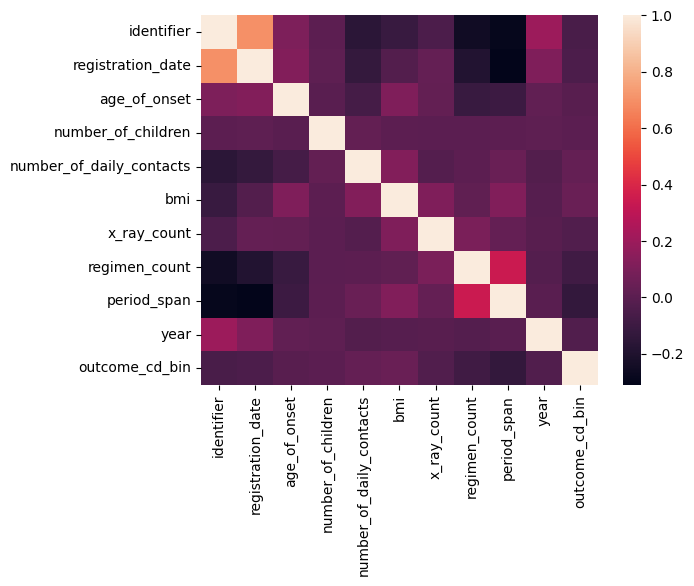

In [25]:
sns.heatmap(patients_total.corr())

In [26]:
patients_total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23337 entries, 0 to 13239
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   patient_id                23337 non-null  object 
 1   identifier                23337 non-null  int64  
 2   registration_date         23337 non-null  int64  
 3   age_of_onset              23337 non-null  int64  
 4   gender                    23337 non-null  object 
 5   country                   23337 non-null  object 
 6   education                 23337 non-null  object 
 7   employment                23337 non-null  object 
 8   number_of_children        23337 non-null  int32  
 9   number_of_daily_contacts  23337 non-null  int32  
 10  case_definition           23337 non-null  object 
 11  diagnosis_code            23337 non-null  object 
 12  type_of_resistance        23337 non-null  object 
 13  bmi                       23337 non-null  float64
 14  lung_l

In [27]:
columns_list = patients_total.columns

In [28]:
columns_list

Index(['patient_id', 'identifier', 'registration_date', 'age_of_onset',
       'gender', 'country', 'education', 'employment', 'number_of_children',
       'number_of_daily_contacts', 'case_definition', 'diagnosis_code',
       'type_of_resistance', 'bmi', 'lung_localization', 'x_ray_count',
       'comorbidity', 'regimen_count', 'regimen_drug_x', 'status',
       'condition_id', 'period_span', 'regimen_drug_y', 'outcome_cd',
       'outcome_cd_state', 'year', 'outcome_cd_bin'],
      dtype='object')

In [29]:
patients_total['comorbidity'].unique()

array(['None', 'Diabetes, Hepatitis C, HIV', 'Others', 'Hepatic diseases',
       'Not specified', 'HIV', 'Hepatic diseases, HIV',
       'Hepatic diseases, None', 'Anemia, Hepatitis C, HIV',
       'Anemia, Hepatitis C', 'Diabetes', 'COVID-19, Others', 'Anemia',
       'Renal disease', 'HIV, Others', 'Anemia, Others',
       'Anemia, Renal disease', 'Diabetes, Others', 'Hepatitis C, HIV',
       'Anemia, HIV', 'Anemia, Hepatic diseases', 'Hepatitis C',
       'Diabetes, Hepatitis C', 'Anemia, HIV, Psychiatric illness',
       'COVID-19, Hepatitis C, HIV', 'Hepatitis C, HIV, Others',
       'Hepatitis B, Hepatitis C, HIV', 'Diabetes, Hepatitis B',
       'Hepatitis C, Others', 'Diabetes, Renal disease',
       'Hepatic diseases, HIV, Others', 'COVID-19, None',
       'Anemia, Psychiatric illness', 'Hepatitis B, Hepatitis C',
       'COVID-19', 'Anemia, COVID-19', 'Anemia, Hepatitis B, HIV',
       'Post-COVID-19', 'Anemia, HIV, Post-COVID-19',
       'Psychiatric illness',
       'Anem

### Feature selection...
- training features
- categorical features
- outcome

In [30]:
features = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'age_of_onset', 'bmi', 'period_span',
            'case_definition', 'status', 'regimen_drug_x', 'comorbidity','regimen_count', 'regimen_drug_y'
           ]
training_features = patients_total[features]

outcome = ['outcome_cd_bin']
outcome_label = patients_total[outcome]

In [31]:
categorical_columns = ['gender', 'country', 'education', 'employment',
                       'number_of_children', 'number_of_daily_contacts', 'type_of_resistance',
                      'lung_localization', 'x_ray_count', 'case_definition', 'status', 'regimen_drug_x','regimen_drug_y',
                       'regimen_count', 'comorbidity']

numerical_columns = ['age_of_onset', 'bmi', 'period_span']


### Scaling the numerical columns using the sklearn StandardScalar

In [32]:
ss = StandardScaler()
ss.fit(training_features[numerical_columns])
training_features[numerical_columns] = ss.transform(training_features[numerical_columns])
print('fitted_training features:')
training_features

fitted_training features:


C:\Users\oyeni\AppData\Local\Temp\ipykernel_12136\1298768005.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  training_features[numerical_columns] = ss.transform(training_features[numerical_columns])


,gender,country,education,employment,number_of_children,number_of_daily_contacts,type_of_resistance,lung_localization,x_ray_count,age_of_onset,bmi,period_span,case_definition,status,regimen_drug_x,comorbidity,regimen_count,regimen_drug_y
0,Female,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,-1.319428,-0.937117,-0.479000,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
1,Male,Moldova,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,0.456071,-0.193101,-0.425257,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
2,Male,Moldova,"Complete school (a-level, gymnasium)",Disabled,0,1,MDR non XDR,Pulmonary,1,-1.248408,1.341298,0.403926,Failure,final,"Bedaquiline, Capreomycin, Cycloserine, Linezol...",None,1,"{Bdq,Cm,Cs,Lzd,Mfx,Z}"
3,Male,Ukraine,College (bachelor),Unemployed,0,1,XDR,Pulmonary,1,-0.325148,0.769149,0.421841,Failure,final,"Amoxicillin-clavulanate, Bedaquiline, Capreomy...","Diabetes, Hepatitis C, HIV",1,"{Amx/Clv,Bdq,Cm,Dld,Ipm/Cln,Lzd}"
4,Male,Georgia,Not Reported,Unemployed,0,1,Sensitive,Pulmonary,1,1.166271,-0.937117,-0.486678,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,2,"{E,H,R,Z}"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13235,Male,Kazakhstan,"Complete school (a-level, gymnasium)",Employed,2,3,Mono DR,Pulmonary,1,-0.751268,0.457068,-0.944775,New,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin","Not specified, Systemically administered gluco...",2,"{H,R}"
13236,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,0,1,Sensitive,Pulmonary,1,-0.112088,0.118980,-0.499474,Other,final,"Ethambutol, Isoniazid, Pyrazinamide, Rifampicin",None,1,"{E,H,R,Z}"
13237,Male,Ukraine,Not Reported,Unemployed,0,1,MDR non XDR,Pulmonary,1,-0.325148,1.159250,-0.251231,New,final,"Bedaquiline, Clofazimine, Cycloserine, Levoflo...",None,1,"{Bdq,Cfz,Cs,Lfx,Lzd}"
13238,Male,Ukraine,"Complete school (a-level, gymnasium)",Unemployed,2,3,MDR non XDR,Pulmonary,1,0.171991,-0.687230,-0.919183,Chronic TB,final,"Bedaquiline, Clofazimine, Delamanid, Levofloxa...",None,1,"{Bdq,Cfz,Dld,Lfx,Lzd}"


In [33]:
training_features = pd.get_dummies(training_features,columns=categorical_columns)
training_features.head()

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
0,-1.319428,-0.937117,-0.479000,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0.456071,-0.193101,-0.425257,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.248408,1.341298,0.403926,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.325148,0.769149,0.421841,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.166271,-0.937117,-0.486678,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
engineering_features = list(set(training_features.columns) - set(numerical_columns))
print('engineering features:')
engineering_features

engineering features:


['country_India',
 'regimen_drug_y_{Amx/Clv,Cm,Cs,Eto,Ipm/Cln,Lzd,Mfx,Pas,Z}',
 'regimen_drug_y_{Cm,Cs,Eto,Lfx,Lzd,Z}',
 'regimen_drug_y_{Am,E,Ofx,R,Z}',
 'regimen_drug_y_{Cfz,Cs,Lfx,Lzd,Z}',
 'regimen_drug_x_Bedaquiline, Capreomycin, Clofazimine, Levofloxacin, Linezolid',
 'regimen_drug_y_{Amx/Clv,Cs,Mfx,Pas,Pto,Z}',
 'regimen_drug_x_Bedaquiline, Clofazimine, Delamanid, Levofloxacin, Linezolid, Moxifloxacin',
 'regimen_drug_y_{Cm,Cs,H,Mfx,Pas,Pto}',
 'regimen_drug_y_{Am,Amx/Clv,ART,Bdq,Cfz,Cotrimoxazol,Cs,Dld,Ipm/Cln,Lzd}',
 'regimen_drug_y_{Cs,E,Lfx,Pa,Z}',
 'regimen_drug_x_Amikacin, Capreomycin, Ethambutol, Isoniazid, Kanamycin, Levofloxacin, Moxifloxacin, Ofloxacin, Pyrazinamide, Rifampicin',
 'regimen_drug_y_{Amx/Clv,Cm,Mfx,Pas,Pto,Z}',
 'regimen_drug_x_Capreomycin, Cycloserine, Ethambutol, Ethionamide, Isoniazid, Levofloxacin, Linezolid, Moxifloxacin, Pyrazinamide, Rifampicin',
 'regimen_drug_x_Amoxicillin-clavulanate, Cycloserine, Imipenem-cilastatin, Linezolid, Moxifloxacin, p-

### Splitting the data into:
    - TRAINING and
    - TESTING
    data with 0.3 test size - 30%

In [35]:
x_train, x_test, y_train, y_test = train_test_split(training_features, outcome_label, test_size=0.3, random_state=30)
x_test

,age_of_onset,bmi,period_span,gender_Female,gender_Male,country_Azerbaijan,country_Belarus,country_China,country_Georgia,country_India,...,"comorbidity_Others, Post-COVID-19","comorbidity_Others, Psychiatric illness","comorbidity_Others, Renal disease","comorbidity_Others, Systemically administered glucocorticoids, cytostatics, TNF-α antagonists",comorbidity_Pneumoconiosis,comorbidity_Post-COVID-19,comorbidity_Psychiatric illness,"comorbidity_Psychiatric illness, Renal disease",comorbidity_Renal disease,"comorbidity_Systemically administered glucocorticoids, cytostatics, TNF-α antagonists"
9875,-0.893308,1.029217,-0.243553,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5103,-1.248408,-0.349142,-0.225639,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2629,-2.029627,-1.727500,-0.228198,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6741,-0.041068,0.275021,0.342505,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
11506,-0.680248,1.575359,-0.624875,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
810,0.029952,-0.245115,0.260611,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1477,0.811171,-0.937117,-0.898710,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1884,-0.183108,-0.937117,-0.604401,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10253,-0.254128,-0.791257,-0.714447,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
x_test_rf = x_test.copy()
x_test_lr = x_test.copy()
x_test_svm = x_test.copy()
x_test_knn = x_test.copy()

### Logistic Regression model:
- is the appropriate regression analysis to conduct when the dependent variable is dichotomous (binary).  Like all regression analyses, the logistic regression is a predictive analysis.  Logistic regression is used to describe data and to explain the relationship between one dependent binary variable and one or more nominal, ordinal, interval or ratio-level independent variables.


In [37]:
lr = LogisticRegression()
model_lr = lr.fit(training_features,np.array(outcome_label['outcome_cd_bin']))
model_lr

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

accuracy score: 0.7883618288554656

classification report:
               precision    recall  f1-score   support

           0       0.74      0.56      0.63      2146
           1       0.80      0.95      0.87     12855
           2       0.00      0.00      0.00         0
           3       0.77      0.47      0.58      2660

   micro avg       0.79      0.83      0.81     17661
   macro avg       0.58      0.49      0.52     17661
weighted avg       0.78      0.83      0.80     17661


confusion matrix:
 [[ 1192   415    49   419    71]
 [  147 12226   241   149    92]
 [   45  1253  1245    84    33]
 [  155   771    42  2878    41]
 [   77   701    40   114   857]]

precison,recall,fscore,support ARRAYS:
 (array([0.73762376, 0.79565274, 0.76994434, 0.78979144, 0.7833638 ]), array([0.555452  , 0.95106962, 0.46804511, 0.74041677, 0.47903857]), array([0.63370548, 0.86644697, 0.58218377, 0.76430753, 0.5945196 ]), array([ 2146, 12855,  2660,  3887,  1789], dtype=int64))

sensitivity 

c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\oyeni\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifie

<AxesSubplot: >

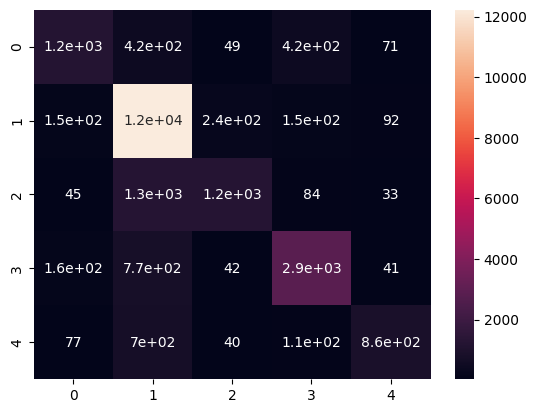

In [38]:
predicted_label  = model_lr.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label, labels=[0,1,2,3]))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label,average='micro')
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label, average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)
sns.heatmap(cm,annot=True)

#### Approximately 79% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [39]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_lr.predict(x_test)))

Accuracy on test dataset:  0.7864895744073122


- 78.6% accuracy on the test set.

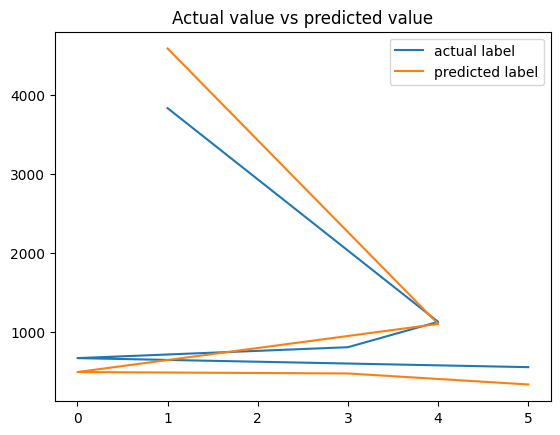

In [40]:
y_pred = model_lr.predict(x_test_lr)
x_test_lr['actual_label'] = y_test 
x_test_lr['predicted_label'] = y_pred

x_test_lr['actual_label'].value_counts().plot(label='actual label')
x_test_lr['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('lr_comparison.jpg')

### Random Forest model:
     is an ensemble learning method for classification, regression and other tasks that operates by constructing a multitude of   decision trees at training time.
          It is also an estimator that fits a number of decision tree classifiers on various sub-samples of the data set and uses averaging to improve the predictive accuracy and control over-fitting.
     For classification tasks, the output of the random forest is the class selected by most trees

![random forest](RandomForestClassification.jpg)

In [41]:
rf = RandomForestClassifier()
model_rf = rf.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

accuracy score: 0.9959720615331876

classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2146
           1       1.00      1.00      1.00     12855
           3       0.99      0.98      0.99      2660
           4       1.00      1.00      1.00      3887
           5       1.00      0.99      1.00      1789

    accuracy                           1.00     23337
   macro avg       1.00      0.99      1.00     23337
weighted avg       1.00      1.00      1.00     23337


confusion matrix:
 [[ 2146     0     0     0     0]
 [    0 12821    26     8     0]
 [    0    42  2616     2     0]
 [    0     5     2  3880     0]
 [    0     2     7     0  1780]]

precison,recall,fscore,support ARRAYS:
 (array([1.        , 0.9961927 , 0.98679743, 0.99742931, 1.        ]), array([1.        , 0.99735511, 0.98345865, 0.99819913, 0.99496926]), array([1.        , 0.99677357, 0.98512521, 0.99781407, 0.99747829]), array([ 2146, 12

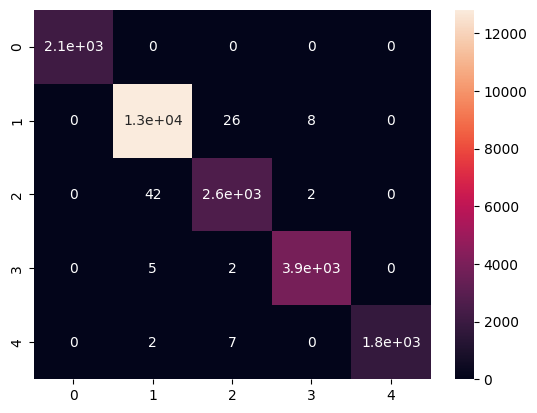

In [42]:
predicted_label  = model_rf.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### 99.5% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [43]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_rf.predict(x_test)))

Accuracy on test dataset:  0.9957155098543273


- Almost 100% accuracy on test set

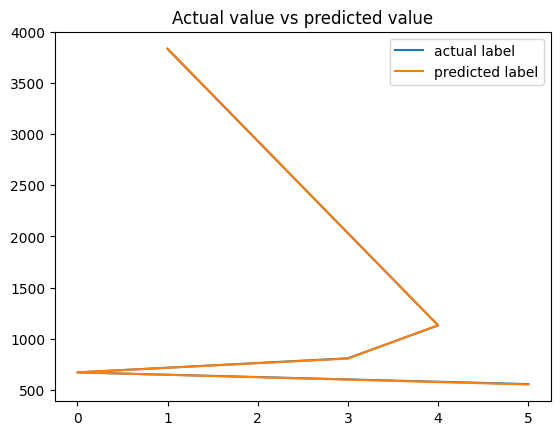

In [44]:
y_pred = model_rf.predict(x_test_rf)
x_test_rf['actual_label'] = y_test 
x_test_rf['predicted_label'] = y_pred

x_test_rf['actual_label'].value_counts().plot(label='actual label')
x_test_rf['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('rf_comparison.jpg')

### Support Vector Machine

In [45]:
svc = SVC()
model_svc = svc.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

accuracy score: 0.8384539572352916

classification report:
               precision    recall  f1-score   support

           0       0.88      0.71      0.79      2146
           1       0.82      0.98      0.89     12855
           3       0.89      0.51      0.65      2660
           4       0.87      0.81      0.84      3887
           5       0.88      0.51      0.65      1789

    accuracy                           0.84     23337
   macro avg       0.87      0.71      0.76     23337
weighted avg       0.85      0.84      0.83     23337


confusion matrix:
 [[ 1529   312    28   224    53]
 [    8 12621   101    96    29]
 [   10  1226  1369    49     6]
 [  118   581    19  3137    32]
 [   78   701    15    84   911]]

precison,recall,fscore,support ARRAYS:
 (array([0.87722318, 0.81736934, 0.89360313, 0.87381616, 0.88360815]), array([0.71248835, 0.98179697, 0.51466165, 0.80704914, 0.50922303]), array([0.78632039, 0.89206955, 0.65314885, 0.83910659, 0.64609929]), array([ 2146, 12

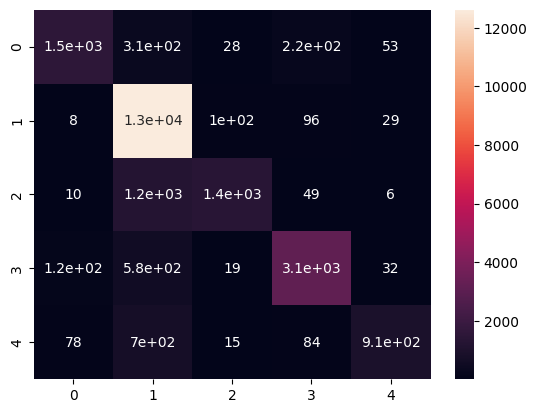

In [46]:
predicted_label  = model_svc.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### Almost 84% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [47]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_svc.predict(x_test)))

Accuracy on test dataset:  0.8374750071408169


- 83.75 % accuracy on test set

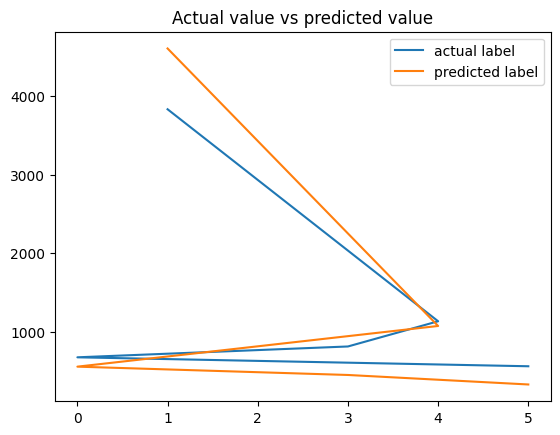

In [48]:
y_pred = model_svc.predict(x_test_svm)
x_test_svm['actual_label'] = y_test 
x_test_svm['predicted_label'] = y_pred

x_test_svm['actual_label'].value_counts().plot(label='actual label')
x_test_svm['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('svm_comparison.jpg')

### K Nearest Neighbours:
    is a non-parametric, supervised learning classifier, which uses proximity to make classifications or predictions about the grouping of an individual data point. While it can be used for either regression or classification problems, it is typically used as a classification algorithm, working off the assumption that similar points can be found near one another.

In [49]:
knn = KNeighborsClassifier()
model_knn = knn.fit(training_features,np.array(outcome_label['outcome_cd_bin']))

accuracy score: 0.8523803402322492

classification report:
               precision    recall  f1-score   support

           0       0.77      0.79      0.78      2146
           1       0.86      0.96      0.91     12855
           3       0.84      0.71      0.77      2660
           4       0.87      0.76      0.81      3887
           5       0.86      0.56      0.68      1789

    accuracy                           0.85     23337
   macro avg       0.84      0.76      0.79     23337
weighted avg       0.85      0.85      0.85     23337


confusion matrix:
 [[ 1693   234    28   144    47]
 [  151 12347   149   135    73]
 [   56   659  1880    44    21]
 [  183   617    94  2963    30]
 [  130   441    88   121  1009]]

precison,recall,fscore,support ARRAYS:
 (array([0.76502485, 0.86354735, 0.83966056, 0.86968007, 0.85508475]), array([0.7889096 , 0.9604823 , 0.70676692, 0.76228454, 0.56400224]), array([0.77678367, 0.9094391 , 0.76750357, 0.81244859, 0.67969013]), array([ 2146, 12

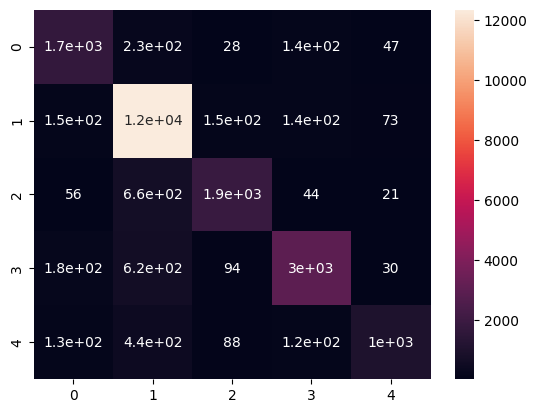

In [50]:
predicted_label  = model_knn.predict(training_features)
actual_label = np.array(outcome_label['outcome_cd_bin'])
print('accuracy score:',accuracy_score(actual_label,predicted_label))
print('\nclassification report:\n',classification_report(actual_label,predicted_label))
print('\nconfusion matrix:\n',confusion_matrix(actual_label,predicted_label))
print('\nprecison,recall,fscore,support ARRAYS:\n',precision_recall_fscore_support(actual_label,predicted_label))
# def specificity(y_true , y_pred):
#     w,x,y,z = precision_recall_fscore_support(actual_label,predicted_label)
#     return(x[0])
print('\nsensitivity score:\n',recall_score(actual_label,predicted_label,average='micro'))
# print('\nspecificity score:\n',specificity(actual_label,predicted_label))

cm = confusion_matrix(actual_label,predicted_label)

sns.heatmap(cm,annot=True)
plt.show()

#### 85.2% accuracy on the training set
#### This summary shows:
- confusion matrix 
- classification report
- precision, recall score
- and also a heatmap showing the confusion matrix

In [51]:
print('Accuracy on test dataset: ', accuracy_score(y_test, model_knn.predict(x_test)))

Accuracy on test dataset:  0.8524707226506713


- 85.26% accuracy on test set

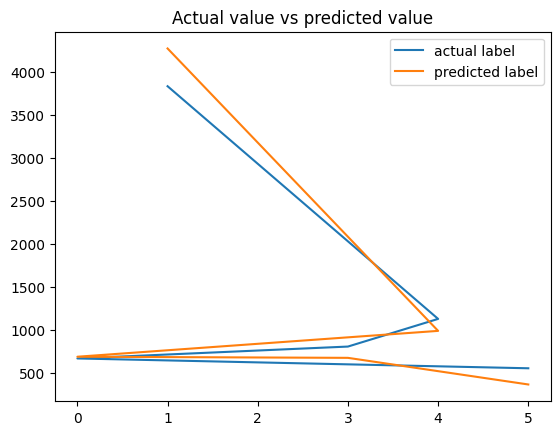

In [52]:
y_pred = model_knn.predict(x_test_knn)
x_test_knn['actual_label'] = y_test 
x_test_knn['predicted_label'] = y_pred

x_test_knn['actual_label'].value_counts().plot(label='actual label')
x_test_knn['predicted_label'].value_counts().plot(label='predicted label', title = 'Actual value vs predicted value')
plt.legend()
plt.savefig('knn_comparison.jpg')